<a href="https://colab.research.google.com/github/VanTam23/AI/blob/main/Bai_Robot_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import openpyxl
from math import cos, sin, pi
from pandas import DataFrame
import numpy as np

l1 = 50
l2 = 40
l3 = 20
theta1 = []
theta2 = []
px = []
py = []

for i1 in range (0,90*10):
    for i2 in range (0,150*10):
        t1 = i1/10
        t2 = i2/10
        theta1.append(t1)
        theta2.append(t2)
        px.append(round(l1*cos(t1*pi/180) + l2*cos((t1+t2)*pi/180),2))
        py.append(round(l1*sin(t1*pi/180) + l2*sin((t1+t2)*pi/180),2))
df = DataFrame(np.c_[theta1,theta2,px,py],columns = ['theta1','theta2','px','py'])
export_csv = df.to_csv (r'2tudo.csv', index = None, header=True)




In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop, Adam, SGD

# load data
url ='2tudo.csv'
data = pd.read_csv(url)
x = data.drop(['theta1', 'theta2'], axis= 1)
y = data.drop(['px', 'py'], axis= 1)
col_names = list(x.columns)
s_scaler = StandardScaler()
X_df = s_scaler.fit_transform(x)
X_df = pd.DataFrame(X_df, columns= col_names)
X_df.describe().T


,count,mean,std,min,25%,50%,75%,max
px,1360000.0,4.227766e-15,1.0,-1.699067,-0.783547,-0.232352,0.732156,2.233909
py,1360000.0,2.336387e-14,1.0,-2.336889,-0.793459,-0.009085,0.820766,1.846594


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size = 0.25, random_state = 7)
print(X_train.shape, X_test.shape)
print(X_train)
print(X_test)
model = Sequential()
model.add(Dense(512, activation= 'relu', input_shape = (2,)))
model.add(Dense(512, activation= 'relu'))))
model.add(Dense(100, activation= 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(2))

model.summary()
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mse', optimizer = RMSprop(), metrics = ['mean_absolute_error'])

history = model.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test))
score = model.evaluate(X_test, y_test, verbose = 0)

(1020000, 2) (340000, 2)
               px        py
1206991 -0.803985 -1.745678
348428  -0.461070 -1.624248
1089862  0.241305  1.620612
807874   0.525499  1.259603
1245177 -1.350962  0.819360
...           ...       ...
839891   1.047820  1.042060
535030  -0.471776 -0.305394
573977  -0.350442  0.133912
1238212 -1.107645  1.251633
585903  -0.406567  0.071087

[1020000 rows x 2 columns]
               px        py
729502   1.089346  0.931413
788756  -0.666754 -1.633156
210615  -0.347198 -1.314343
1230694 -0.997017 -1.575488
206613   0.599467 -0.021275
...           ...       ...
725035  -0.256360  0.764974
628443  -0.525955 -0.025963
935089   0.815533  1.267573
876321  -0.571050  0.855930
197888   1.119517 -0.016587

[340000 rows x 2 columns]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               300       
                            

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


7969/7969 [==============================] - 77s 9ms/step - loss: 79.4196 - mean_absolute_error: 5.6665 - val_loss: 15.6145 - val_mean_absolute_error: 3.4018
Epoch 2/10
7969/7969 [==============================] - 61s 8ms/step - loss: 11.1488 - mean_absolute_error: 2.5998 - val_loss: 4.3398 - val_mean_absolute_error: 1.4466
Epoch 3/10
7969/7969 [==============================] - 61s 8ms/step - loss: 6.8381 - mean_absolute_error: 2.0193 - val_loss: 4.6052 - val_mean_absolute_error: 1.6460
Epoch 4/10
7969/7969 [==============================] - 60s 8ms/step - loss: 5.1249 - mean_absolute_error: 1.7390 - val_loss: 1.7861 - val_mean_absolute_error: 1.0865
Epoch 5/10
7969/7969 [==============================] - 65s 8ms/step - loss: 4.1478 - mean_absolute_error: 1.5487 - val_loss: 4.5369 - val_mean_absolute_error: 1.6687
Epoch 6/10
7969/7969 [==============================] - 60s 8ms/step - loss: 3.5208 - mean_absolute_error: 1.4136 - val_loss: 3.9947 - val_mean_absolute_error: 1.6909
Epoch 

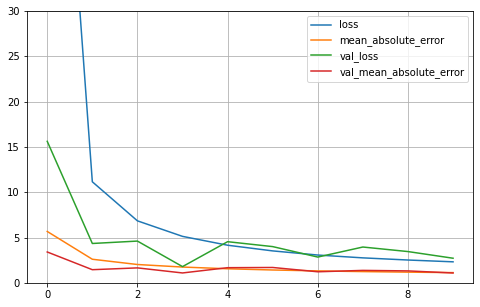

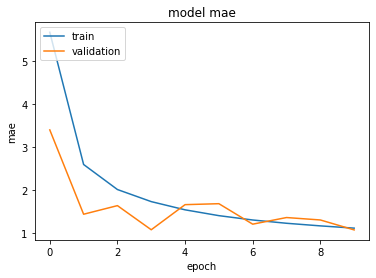

In [12]:
pd.DataFrame(history.history).plot(figsize= (8,5))
plt.grid(True)
plt.gca().set_ylim(0,30)
plt.show()

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()